In [88]:
import sys
!{sys.executable} -m pip install azure-cosmos
import os
import datetime
import azure.cosmos.cosmos_client as cosmos_client

In [89]:
client = cosmos_client.CosmosClient(url_connection=os.environ['endpoint'], auth={'masterKey': os.environ['masterKey']})

database_link = 'dbs/' + os.environ['databaseId']
collection_link = database_link + '/colls/{}'.format(os.environ['containerId'])

## Failure ratio of master jobs
Jobs initiated in the last 24h

In [90]:
import pandas as pd

oneDayAgo = (datetime.datetime.now()  - datetime.timedelta(days=1)).isoformat()

query = {
    "query": """
     SELECT c.job_name, c.build_id, c.current_build_current_result, c.stage_timestamp, c._ts
     FROM c
     WHERE c.current_build_scheduled_time > '{0}Z'
         and c.branch_name = 'master'
    """.format(oneDayAgo)
}

query_results = list(client.QueryItems(collection_link, query))

df = pd.DataFrame(query_results)

last_builds = pd.DataFrame(
    df
        .sort_values(by='stage_timestamp')
        .drop_duplicates('job_name', keep='last'),
    columns=sorted.keys()
)

last_builds

,job_name,build_id,current_build_current_result,stage_timestamp,_ts
11,HMCTS_IAC/ia-aip-frontend-tmp/master,59,SUCCESS,2019-10-16T19:12:32Z,1571253152
74,HMCTS_Nightly_SSCS/sscs-performance-tests/master,108,FAILURE,2019-10-16T21:09:22Z,1571260162
80,HMCTS_Nightly_CMC/cmc-performance-test/master,112,SUCCESS,2019-10-16T21:11:13Z,1571260273
83,HMCTS_Nightly_CDM/ccd-cdm-performance/master,71,SUCCESS,2019-10-16T21:15:56Z,1571260556
85,HMCTS_Nightly_DIV/divorce-performance-tests/ma...,131,SUCCESS,2019-10-16T21:16:10Z,1571260570
...,...,...,...,...,...
1806,HMCTS_RPA/rpa-em-annotation-api/master,79,SUCCESS,2019-10-17T18:00:37Z,1571335237
1810,HMCTS_BSP/bulk-scan-orchestrator/master,110,SUCCESS,2019-10-17T18:19:24Z,1571336364
1821,HMCTS_CDM/document-management-store-app/master,40,SUCCESS,2019-10-17T18:41:16Z,1571337677
1823,HMCTS_RPA/rpa-dg-docassembly-api/master,51,SUCCESS,2019-10-17T18:42:44Z,1571337764


In [91]:
total_rows = len(last_builds)
total_rows

93

In [92]:
successes = len(last_builds.loc[df['current_build_current_result'] == 'SUCCESS'])
failures = len(last_builds.loc[df['current_build_current_result'] == 'FAILURE'])

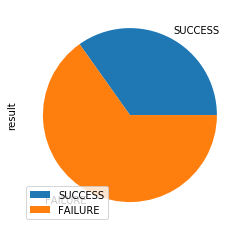

In [93]:
df_result = pd.DataFrame({'result': [successes, failures]},
    index=['SUCCESS', 'FAILURE'])

df_result.plot.pie(y='result')